In [10]:

import networkx as nx
from tools import *
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
import glob
from tqdm import tqdm
plt.style.use('JHStyleBold.mplstyle')

In [11]:
# Configurações de diretórios
path_img_folder = "./Dados_image/FIBRO CITO T0 COL/"
folder_original = glob.glob(path_img_folder + "*")
count = 0


In [12]:
count_nodes_imgs = np.zeros(len(folder_original))
average_degree = np.zeros(len(folder_original))
global_average_clustering = np.zeros(len(folder_original))
for img_path  in tqdm(folder_original):

    img_th = th_otsu(gray(cv2.imread(img_path )))
    sk = skeletonize(img_th,  method= 'zhang').astype(int)*255

    dic,edges,nodes=nodEdg(sk)

    G=nx.from_pandas_edgelist(edges)
    #fig, ax = plt.subplots(figsize = (40, 30))
    pos = dic  # position layout

    #metricas
    count_nodes_imgs[count] = len(nodes)
    average_degree[count] = len(edges)/len(nodes)
    global_average_clustering[count] = nx.average_clustering(G)

    #count faz percorrer por cada imgem
    count+=1

    #nx.draw_networkx(G, pos, nodelist= nodes, node_size=2,with_labels=False, node_color="white",edgecolors='black', linewidths=5, alpha=1 , width = 5)
    #ax.set_axis_off()
    #fig.tight_layout()
    #plt.show()


Quero calcular a quantidade de nodes da rede. Existe uma dispersão grande ? faz sentido procurar a dispersão ? no site tem outras metricas estatisticas q pode ajudar, ou nao

https://docs.python.org/pt-br/3/library/statistics.html#statistics.pstdev

3464.1087179821593


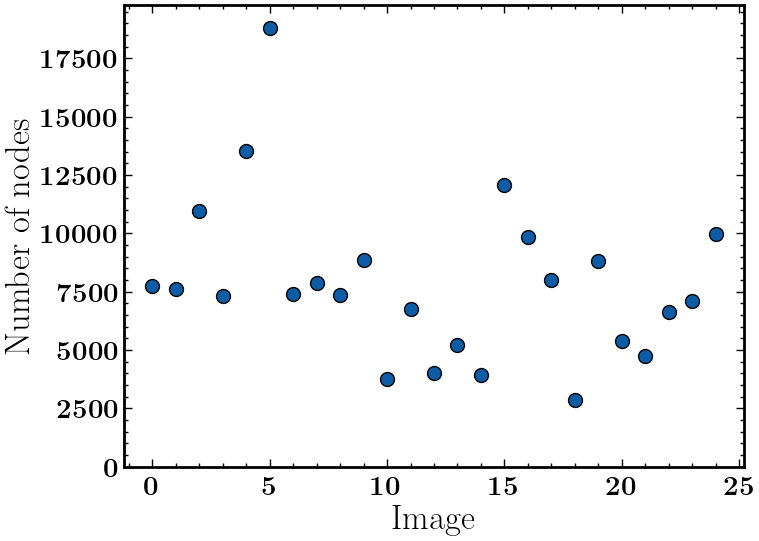

In [13]:
from statistics import stdev
def graphic_nodes(count_nodes_imgs,folder_original):
    x = np.arange(len(folder_original))
    plt.plot(x, count_nodes_imgs, 'o')

    

graphic_nodes(count_nodes_imgs,folder_original)
plt.ylabel('Number of nodes')
plt.xlabel('Image')
plt.ylim([0,np.max(count_nodes_imgs)+1000])
print(stdev(count_nodes_imgs))

aqui estou calculando average degree of a node usando o link. Nesse caso para cada imagem de celula temos um ponto no grafico.

https://bookdown.org/omarlizardo/_main/2-7-average-degree.html



(0.0, 2.4288434683255047)

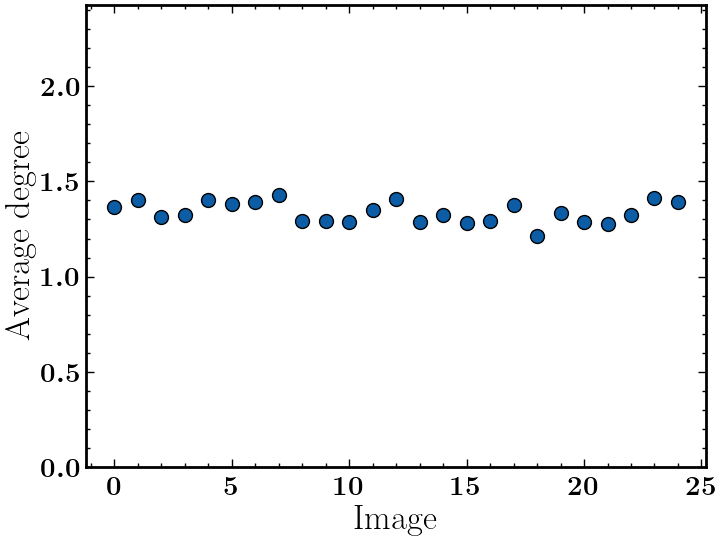

In [14]:
graphic_nodes(average_degree,folder_original)
plt.ylabel('Average degree')
plt.xlabel('Image')
plt.ylim([0,np.max(average_degree)+1])

clustering coefficient of a node Ci is defined as $Ci = \frac{(2Ei)}{(k(k + 1))}$, where k is the number of neighbors of the node i and Ei is the number of existing links between its neighbors.

Obs: It is worth noting that this metric places more weight on the low degree nodes, while the transitivity ratio places more weight on the high degree nodes. (so achei legal!)

No wiki tem dois casos: local e global. Calculei o global pq acho q faz mais sentido para comparar os valores.

https://en.wikipedia.org/wiki/Clustering_coefficient

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.average_clustering.html#networkx.algorithms.cluster.average_clustering

(0.0, 1.2206173126690085)

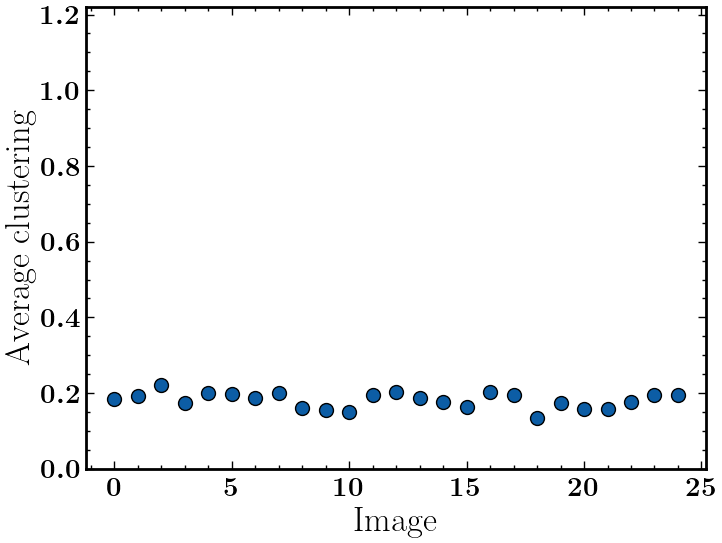

In [15]:
graphic_nodes(global_average_clustering,folder_original)
plt.ylabel('Average clustering')
plt.xlabel('Image')
plt.ylim([0,np.max(global_average_clustering)+1])